In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from constants import DATA_DIR
import functions as F
import nlp_functions as NF

In [3]:
# Import raw json file, perform preprocessing, and save as a parquet file for easy re-loading into a dataframe
products = F.read_products_file('meta_Industrial_and_Scientific.jsonl')
products.shape

Reading pre-processed products data...
Done


(427564, 12)

In [4]:
# Import raw json file, perform preprocessing, and save as a parquet file for easy re-loading into a dataframe
reviews = F.read_reviews_file('Industrial_and_Scientific.jsonl')
reviews.shape

Reading pre-processed reviews data...
Done


(5183005, 9)

In [5]:
# Filter the products to only those containing "filament" in their title and at least one known plastic type
filament_products = F.get_filament_products(products)
filament_products.set_index('parent_asin', drop=True, inplace=True)
filament_products.shape

(7390, 11)

In [6]:
# Get review counts associated with filament products
asin_review_counts = reviews['parent_asin'].value_counts()
present = asin_review_counts.index.isin(filament_products.index)
counts = asin_review_counts[present]
filament_products.loc[counts.index, 'review_count'] = counts.values
filament_products.shape

(7390, 12)

In [8]:
# Save a copy of the filament products dataframe
filament_products.to_parquet(os.path.join(DATA_DIR, f'fil_products.par'))

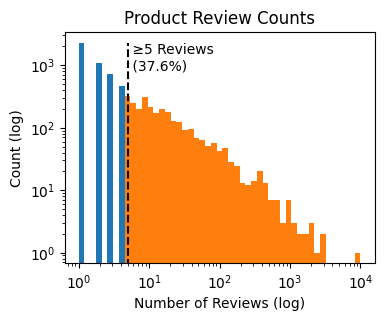

At least 5 Reviews: 2782/7390 (37.6%)


In [ ]:
# Filter to products with >= N reviews
N = 5

subset = filament_products['review_count'][filament_products['review_count']>=N]
frac = f'{len(subset)/len(filament_products):.1%}'

counts, bins, bars = plt.hist(filament_products['review_count'], np.logspace(0, 4, 50))
plt.hist(filament_products['review_count'][filament_products['review_count']>=N], bins)
plt.xlabel('Number of Reviews (log)')
plt.ylabel('Count (log)')
plt.title('Product Review Counts')
plt.vlines(N, 0, max(counts), 'k', 'dashed')
plt.text(N, max(counts), f' ≥5 Reviews\n ({frac})', va='top')
plt.xscale('log')
plt.yscale('log')

plt.gcf().set_size_inches(4, 3)
plt.show()

print(f'At least {N} Reviews: {len(subset)}/{len(filament_products)} ({frac})')

In [ ]:
# Save a copy of the filament products dataframe filtered to products with at least N associated reviews
filament_products[filament_products['review_count']>=N].to_parquet(os.path.join(DATA_DIR, f'fil_products_{N}rev.par'))